In [ ]:
from src.lib.adapter.graph.from_edges import EdgesGraphBuilder
from src.lib.adapter.layout.random_layout import RandomLayout
from src.lib.adapter.visualizer.convex_hull import MatplotlibVisualizer
from src.lib.adapter.heuristics.neighbor_weight_delta import heuristic_delta_by_neighbor_weight
from src.lib.adapter.algorithms.leiden import LeidenAdapter

from typing import Tuple, List
from src.lib.domain.types.nodes import NodeLike

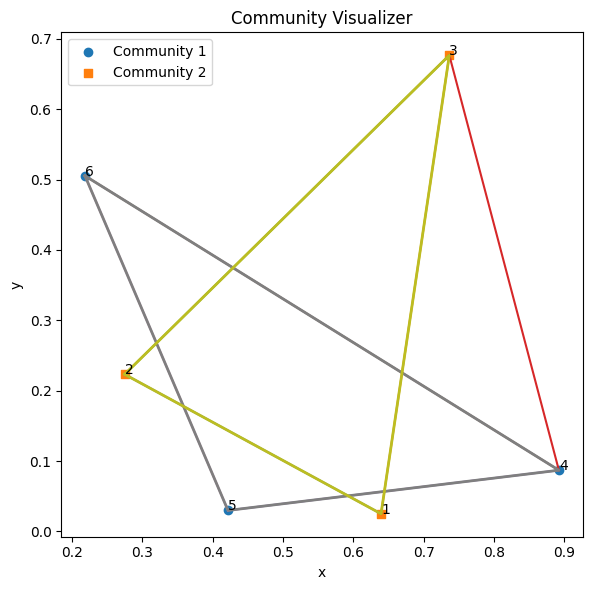

In [4]:
Edge = Tuple[NodeLike, NodeLike, float]
edges: List[Edge] = [
    (1, 2, 1.0), (2, 3, 1.0), (3, 1, 1.0),
    (4, 5, 1.0), (5, 6, 1.0), (6, 4, 1.0),
    (3, 4, 0.1),
]
G = EdgesGraphBuilder().build(edges)
pos = RandomLayout(seed=42).get_positions(G)

algo = LeidenAdapter()
final_partition = algo.detect(
    G,
    p0=None,  # or provide a seed Partition
    delta_fn=heuristic_delta_by_neighbor_weight,
    gamma=1.0,
    theta=1.0,
    max_levels=10,
)

MatplotlibVisualizer().render(G, final_partition, pos, title="Community Visualizer")


In [3]:
print("Final partition:", final_partition)

Final partition: [{4, 5, 6}, {1, 2, 3}]
